# Cluster Analysis

Cluster analysis is a technique in marketing that groups customers into distinct segments based on shared characteristics. By identifying these clusters, companies can understand the needs, behaviors, and preferences within their customer base. This segmentation allows to apply targeted marketing strategies, personalized communication to increase customer satisfaction.

The dataset used to perform cluster analysis is related to some features of bank customers. These features include age, gender, education level, type of credit card, the total amount of the transactions...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
RAW_DATA_PATH = "/content/BankChurners.csv.zip"

In [ ]:
df_raw = pd.read_csv(RAW_DATA_PATH)
df_raw.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df_raw1 = df_raw.drop(df_raw.columns[[4,9,10,11,12,14,15,16,18,19,20,21,22]], axis=1)

In [ ]:
df_raw1

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit,Total_Trans_Amt
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,Blue,12691.0,1144
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue,8256.0,1291
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue,3418.0,1887
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,Blue,3313.0,1171
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Blue,4716.0,816
...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,Graduate,Single,$40K - $60K,Blue,4003.0,15476
10123,710638233,Attrited Customer,41,M,Unknown,Divorced,$40K - $60K,Blue,4277.0,8764
10124,716506083,Attrited Customer,44,F,High School,Married,Less than $40K,Blue,5409.0,10291
10125,717406983,Attrited Customer,30,M,Graduate,Unknown,$40K - $60K,Blue,5281.0,8395


In [ ]:
df_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CLIENTNUM        10127 non-null  int64  
 1   Attrition_Flag   10127 non-null  object 
 2   Customer_Age     10127 non-null  int64  
 3   Gender           10127 non-null  object 
 4   Education_Level  10127 non-null  object 
 5   Marital_Status   10127 non-null  object 
 6   Income_Category  10127 non-null  object 
 7   Card_Category    10127 non-null  object 
 8   Credit_Limit     10127 non-null  float64
 9   Total_Trans_Amt  10127 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 791.3+ KB


# EDA ANALYSIS

In [ ]:
# break variables into categorical and numerical
categorical_cols = (df_raw1.dtypes[df_raw.dtypes == 'object'].index)
numerical_cols = (df_raw1.dtypes[df_raw.dtypes != 'object'].index)

Income category should be a numerical column, we will apply the following method to distinguish the categories:


*   0- Unknown

*  1- Less than 40K
*   2- 40k-60k


*   3- 60K-80K

*   4- 80K-120K
*   5- 120K+






In [ ]:
mapping = {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5}

# Apply the mapping directly on the 'Income_Category' column
df_raw1['Income_Category'] = df_raw1['Income_Category'].map(mapping)

In [ ]:
df_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CLIENTNUM        10127 non-null  int64  
 1   Attrition_Flag   10127 non-null  object 
 2   Customer_Age     10127 non-null  int64  
 3   Gender           10127 non-null  object 
 4   Education_Level  10127 non-null  object 
 5   Marital_Status   10127 non-null  object 
 6   Income_Category  10127 non-null  int64  
 7   Card_Category    10127 non-null  object 
 8   Credit_Limit     10127 non-null  float64
 9   Total_Trans_Amt  10127 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 791.3+ KB


In [ ]:
df_raw1.describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.083043e+08,710160513.0,713036770.5,717926358.0,773143533.0,798512118.0,814212033.0,8.252508e+08,828343083.0
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,2.700000e+01,36.0,41.0,46.0,52.0,57.0,60.0,6.500000e+01,73.0
Income_Category,10127.0,2.085711e+00,1.474639e+00,0.0,0.000000e+00,0.0,1.0,2.0,3.0,4.0,5.0,5.000000e+00,5.0
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,1.438300e+03,1762.0,2555.0,4549.0,11067.5,23400.2,34516.0,3.451600e+04,34516.0
Total_Trans_Amt,10127.0,4.404086e+03,3.397129e+03,510.0,8.692600e+02,1501.0,2155.5,3899.0,4741.0,8212.4,14212.0,1.588236e+04,18484.0


In [ ]:
for column in categorical_cols:
        print("Column: {} - Unique Values: {}".format(column, df_raw1[column].unique()))
        print("="*80)

Column: Attrition_Flag - Unique Values: ['Existing Customer' 'Attrited Customer']
Column: Gender - Unique Values: ['M' 'F']
Column: Education_Level - Unique Values: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Column: Marital_Status - Unique Values: ['Married' 'Single' 'Unknown' 'Divorced']
Column: Income_Category - Unique Values: [3 1 4 2 5 0]
Column: Card_Category - Unique Values: ['Blue' 'Gold' 'Silver' 'Platinum']


There aren't null values so we can proceed further with the analysis.

In [ ]:
df_raw1.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Credit_Limit,0
Total_Trans_Amt,0


Information about the number of osservations of some of the categorical variables

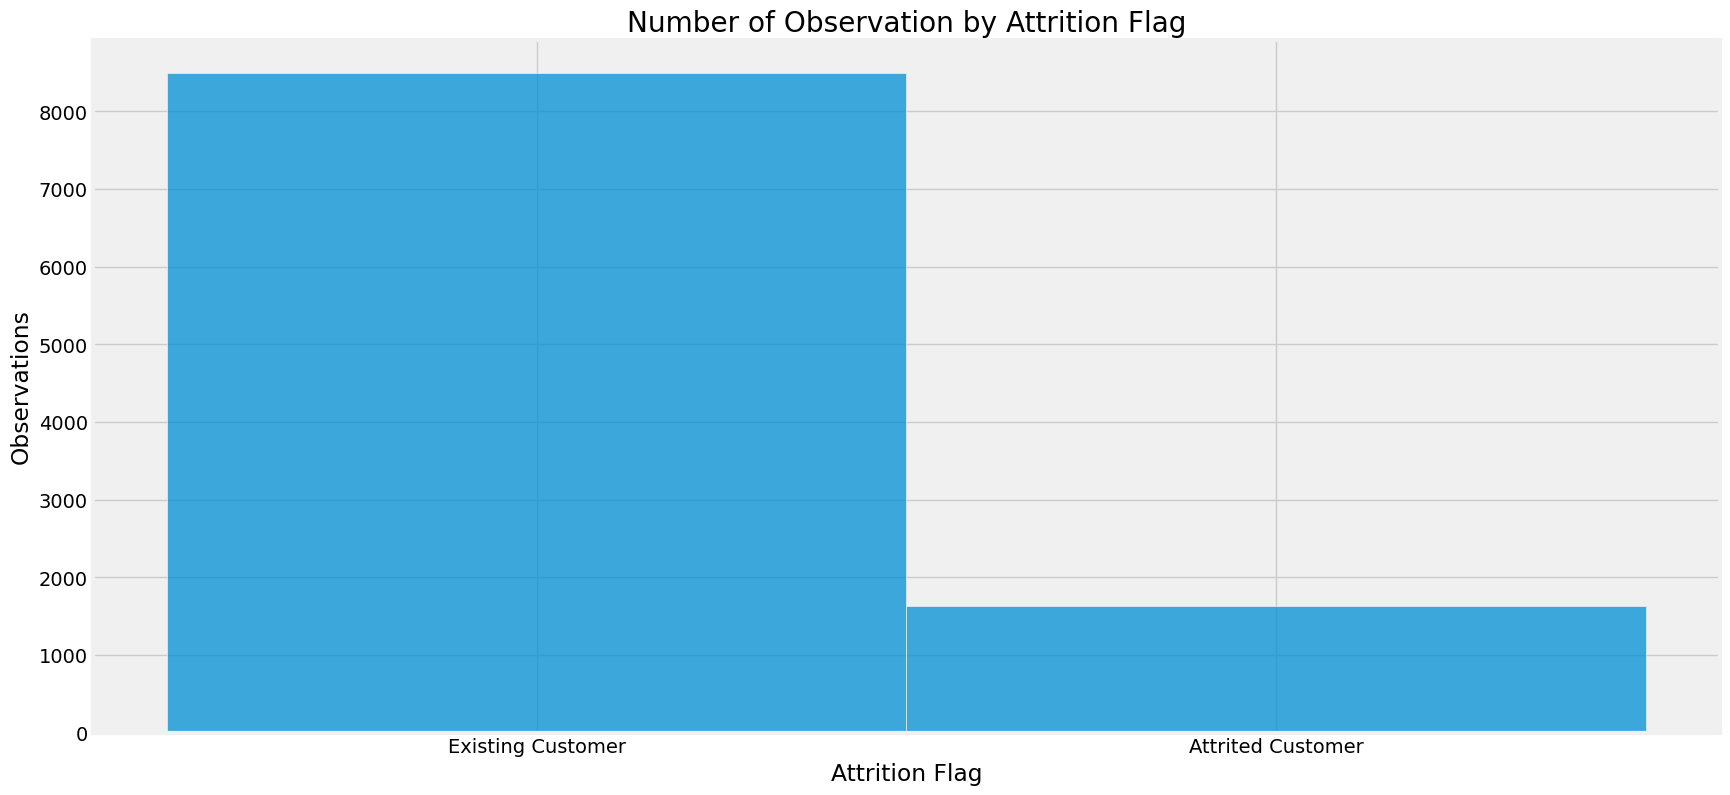

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='Attrition_Flag', data=df_raw1)
plt.xlabel('Attrition Flag')
plt.ylabel('Observations')
plt.title('Number of Observation by Attrition Flag')
plt.show()

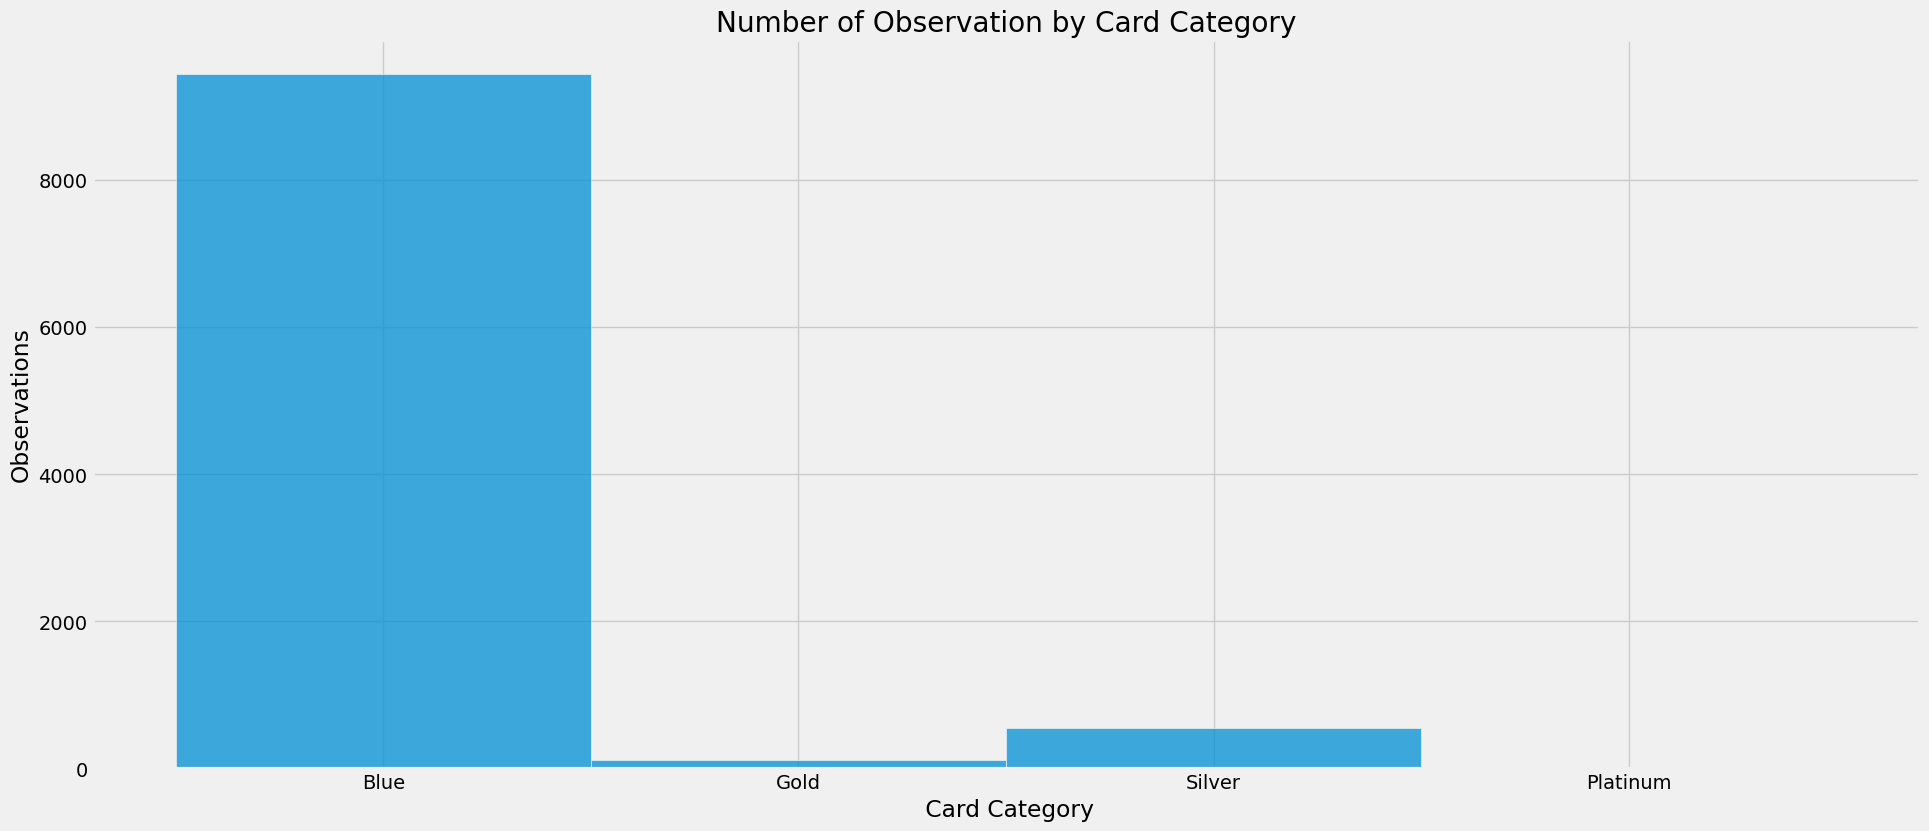

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='Card_Category', data=df_raw1)
plt.xlabel(' Card Category')
plt.ylabel('Observations')
plt.title('Number of Observation by Card Category')
plt.show()

# EXPLORING SOME RELANTIOSHIP BETWEEN VARIABLES

We wil first explore the correlation between age and income.

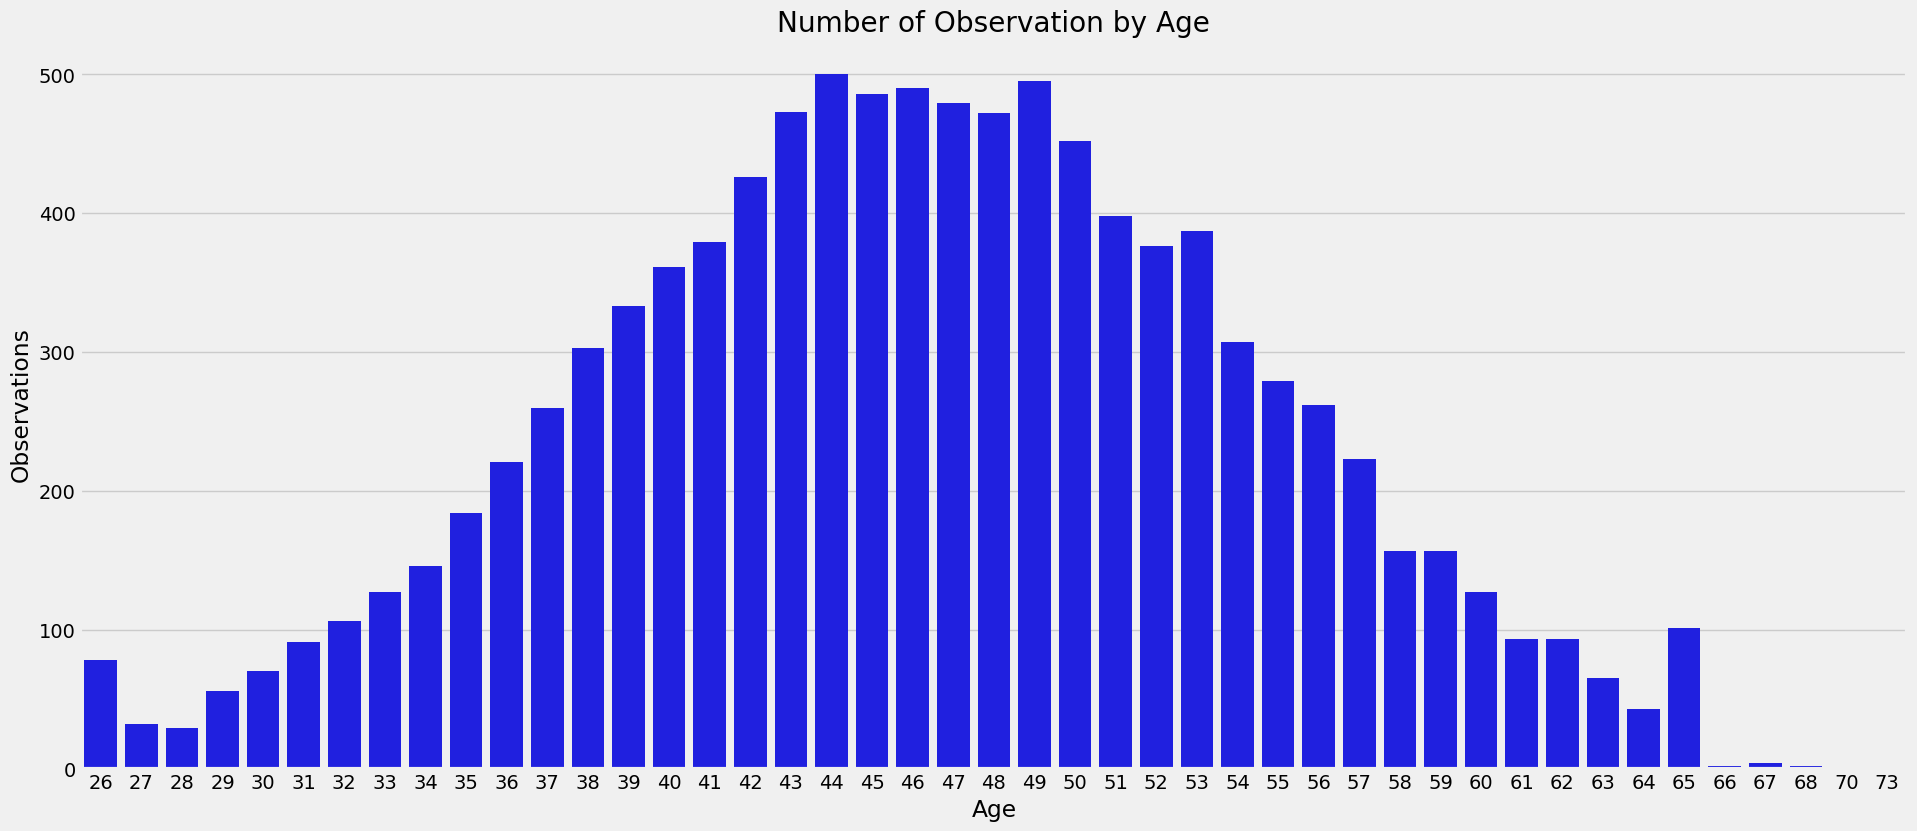

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.countplot(x='Customer_Age', data=df_raw1, color='blue')
plt.xlabel('Age')
plt.ylabel('Observations')
plt.title('Number of Observation by Age')
plt.show()

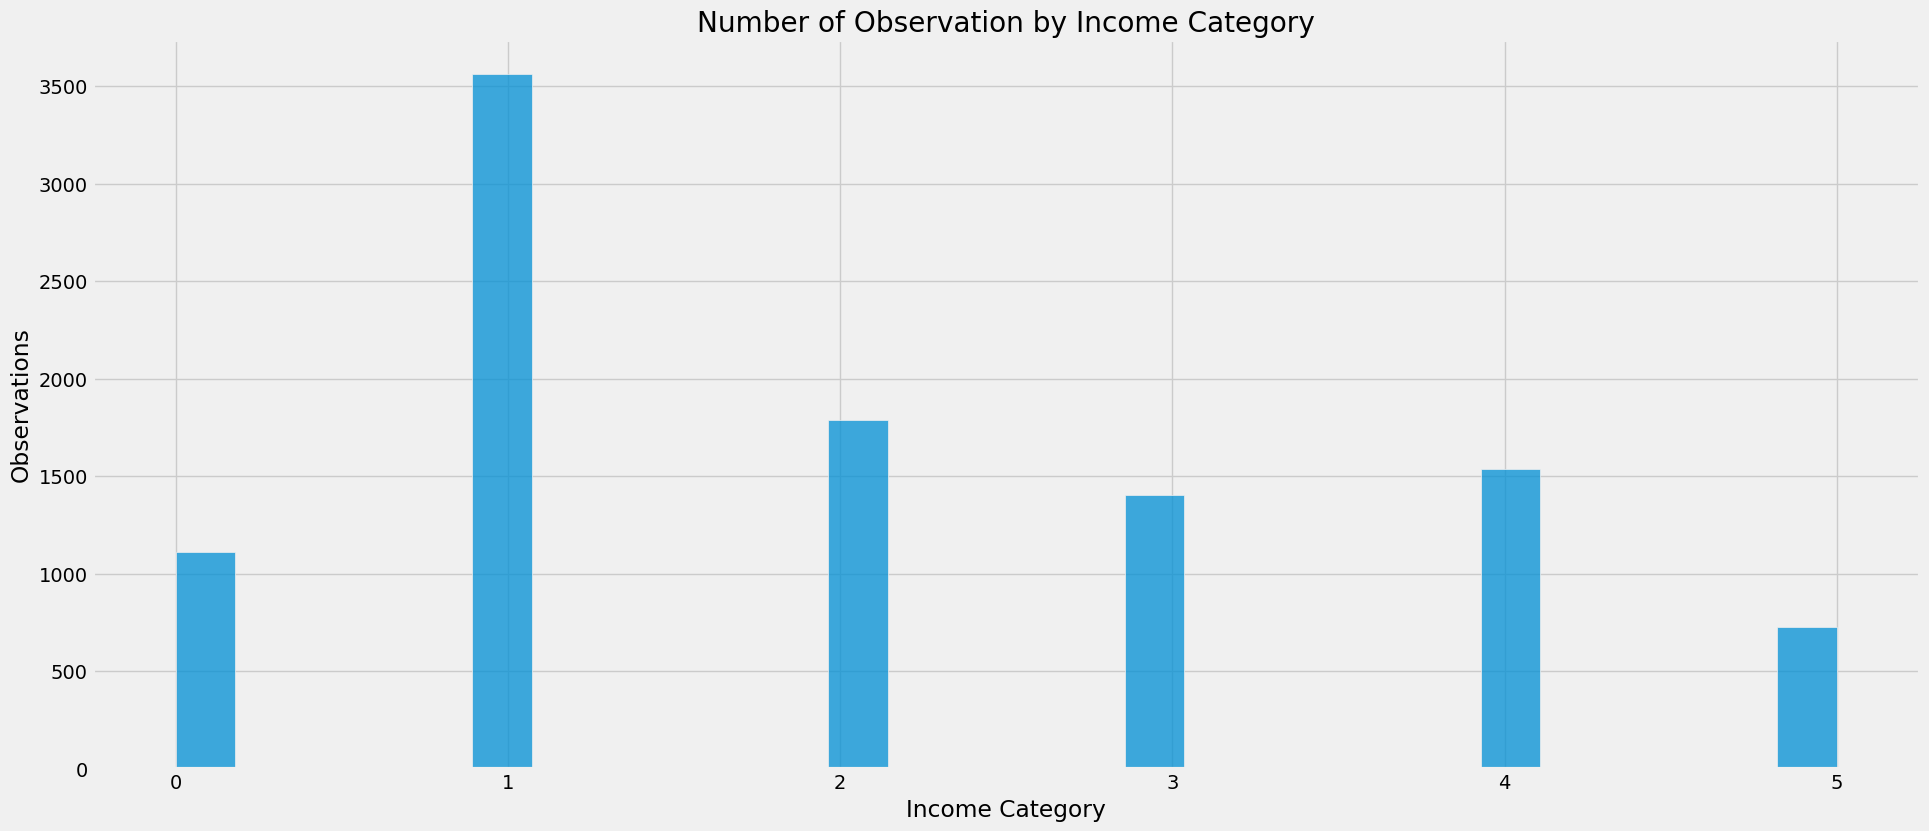

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='Income_Category', data=df_raw1)
plt.xlabel('Income Category')
plt.ylabel('Observations')
plt.title('Number of Observation by Income Category')
plt.show()

In [ ]:
df_raw1[['Customer_Age','Income_Category']].tail(10)

,Customer_Age,Income_Category
10117,57,4
10118,50,4
10119,55,0
10120,54,3
10121,56,1
10122,50,2
10123,41,2
10124,44,1
10125,30,2
10126,43,1


In [ ]:
df_raw1[['Customer_Age','Income_Category']].groupby('Income_Category').agg('mean')

,Customer_Age
Income_Category,
0,46.274281
1,46.297950
2,46.087151
3,45.968616
4,46.428013
5,47.603851


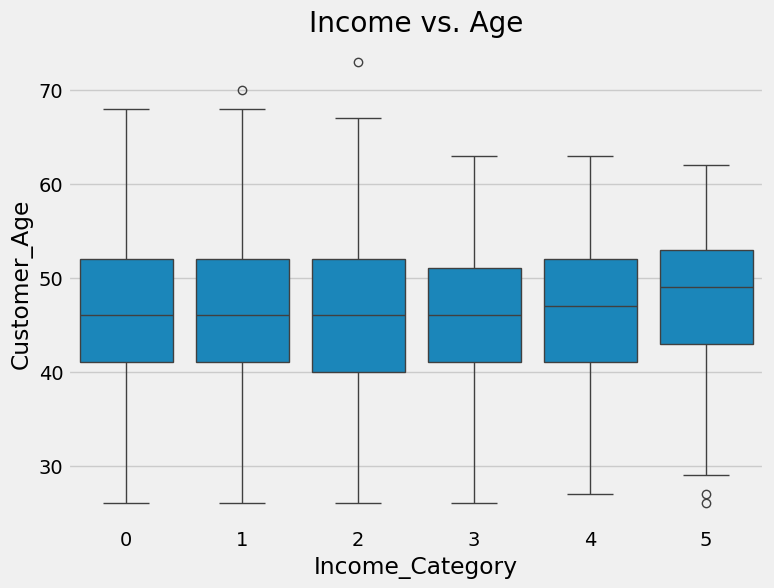

In [ ]:
plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
sns.boxplot(x='Income_Category', y='Customer_Age', data=df_raw1)
plt.xlabel('Income_Category')
plt.ylabel('Customer_Age')
plt.title('Income vs. Age')
plt.show()

In [ ]:
contingecy_table = pd.crosstab(df_raw1['Customer_Age'], df_raw1['Income_Category'])
contingecy_table

Income_Category,0,1,2,3,4,5
Customer_Age,,,,,,
26,18,33,22,4,0,1
27,4,17,6,3,1,1
28,10,15,3,1,0,0
29,6,24,12,8,5,1
30,9,38,6,12,3,2
31,13,45,19,6,8,0
32,13,39,26,16,8,4
33,16,41,26,16,19,9
34,17,50,30,20,19,10


In [ ]:
from scipy.stats import chi2_contingency
chi2, p_value, _, _ = chi2_contingency(contingecy_table)

In [ ]:
p_value

1.2098490642981337e-32

In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypotesis. The income is influenced by the age.")
else:
    print("Fail to reject the null hypotesis. We cannot say that the income is significantly influenced by the age.")

Reject the null hypotesis. The income is influenced by the age.






We will now explore the correlation between gender and income to understand if there is some gender gap.

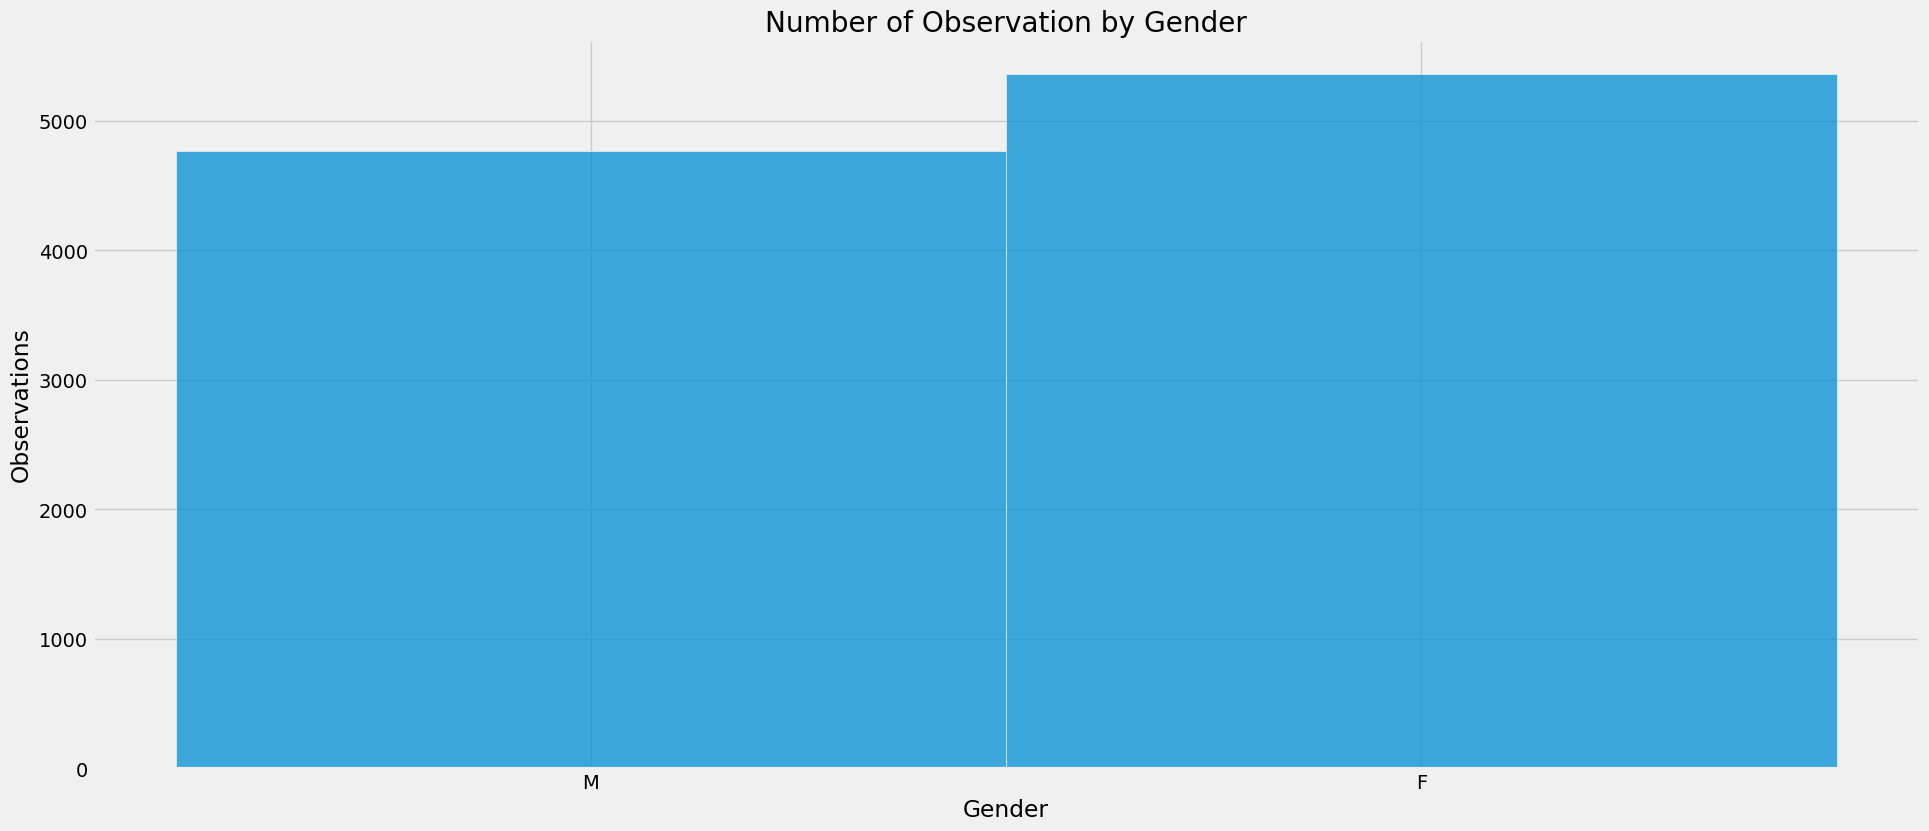

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='Gender', data=df_raw1)
plt.xlabel('Gender')
plt.ylabel('Observations')
plt.title('Number of Observation by Gender')
plt.show()

In [ ]:
df_raw1[['Gender','Income_Category']].tail(10)

,Gender,Income_Category
10117,M,4
10118,M,4
10119,F,0
10120,M,3
10121,F,1
10122,M,2
10123,M,2
10124,F,1
10125,M,2
10126,F,1


In [ ]:
df_raw1[['Income_Category','Gender']].groupby('Gender').agg('mean')

,Income_Category
Gender,
F,0.991415
M,3.315160


We can observe that there is an important gap between Male individuals and Female individuals.
We can see that male individuals has an income that ranges between 60K-80K while female indivuduals income is less than 40k on average.

In [ ]:
contingecy_table = pd.crosstab(df_raw1['Gender'], df_raw1['Income_Category'])
contingecy_table

Income_Category,0,1,2,3,4,5
Gender,,,,,,
F,1060,3284,1014,0,0,0
M,52,277,776,1402,1535,727


In [ ]:
from scipy.stats import chi2_contingency
chi2, p_value, _, _ = chi2_contingency(contingecy_table)

In [ ]:
p_value

0.0

In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypotesis. The income is influenced by the gender.")
else:
    print("Fail to reject the null hypotesis. We cannot say that the income is significantly influenced by the gender.")

Reject the null hypotesis. The income is influenced by the gender.


Now we will verify the correlation between Credit Limit, Total amount of transaction and the Income.

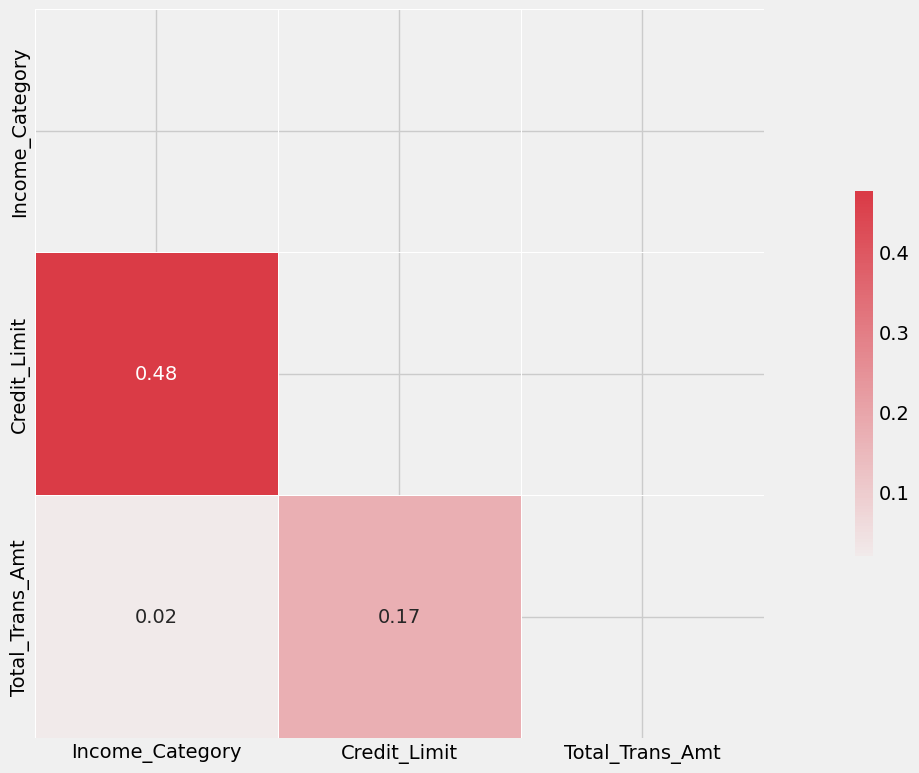

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')

corr = df_raw1.drop(columns=['CLIENTNUM','Attrition_Flag', 'Gender','Education_Level', 'Marital_Status', 'Customer_Age', 'Card_Category']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

We can observe that there is a strong correlation between the limit of the credit card and the income. This makes sense from a business perspective since usually the larger the income, the larger the credit limit.
There is also some correlation between the limit of the credit card and the total transaction amount. This makes sense as well.
Last, there is a little correlation between income ad total transaction amount.

# Dataset Cleaning Process

In [ ]:
df_clean = df_raw1.copy()

In [ ]:
df_clean.drop(columns=['Education_Level','Marital_Status'], inplace=True)

In [ ]:
mapping = {'Existing Customer': 0, 'Attrited Customer': 1}

# Apply the mapping directly on the 'Attrition_Flag' column
df_clean['Attrition_Flag'] = df_clean['Attrition_Flag'].map(mapping)

In [ ]:
mapping = {'M': 0, 'F': 1}

# Apply the mapping directly on the 'Gender' column
df_clean['Gender'] = df_clean['Gender'].map(mapping)

In [ ]:
mapping = {'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3}

# Apply the mapping directly on the 'Card_Category' column
df_clean['Card_Category'] = df_clean['Card_Category'].map(mapping)

In [ ]:
df_clean.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Income_Category,Card_Category,Credit_Limit,Total_Trans_Amt
0,768805383,0,45,0,3,0,12691.0,1144
1,818770008,0,49,1,1,0,8256.0,1291
2,713982108,0,51,0,4,0,3418.0,1887
3,769911858,0,40,1,1,0,3313.0,1171
4,709106358,0,40,0,3,0,4716.0,816


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CLIENTNUM        10127 non-null  int64  
 1   Attrition_Flag   10127 non-null  int64  
 2   Customer_Age     10127 non-null  int64  
 3   Gender           10127 non-null  int64  
 4   Income_Category  10127 non-null  int64  
 5   Card_Category    10127 non-null  int64  
 6   Credit_Limit     10127 non-null  float64
 7   Total_Trans_Amt  10127 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 633.1 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_clean.drop(columns=['CLIENTNUM']))
df_clean_scaled = pd.DataFrame(cluster_scaled, columns=df_clean.drop(columns=['CLIENTNUM']).columns)

In [ ]:
df_clean_scaled.describe()

,Attrition_Flag,Customer_Age,Gender,Income_Category,Card_Category,Credit_Limit,Total_Trans_Amt
count,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,10127.000000,1.012700e+04,1.012700e+04
mean,-1.403264e-17,1.333101e-16,-1.459395e-16,-1.066481e-16,0.000000,1.347133e-16,-8.980890e-17
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049,1.000049e+00,1.000049e+00
min,-4.375063e-01,-2.535541e+00,-1.059956e+00,-1.414457e+00,-0.263462,-7.915266e-01,-1.146344e+00
25%,-4.375063e-01,-6.643815e-01,-1.059956e+00,-7.362920e-01,-0.263462,-6.686548e-01,-6.619405e-01
50%,-4.375063e-01,-4.066159e-02,9.434357e-01,-5.812655e-02,-0.263462,-4.492525e-01,-1.486877e-01
75%,-4.375063e-01,7.078024e-01,9.434357e-01,6.200389e-01,-0.263462,2.679862e-01,9.918090e-02
max,2.285681e+00,3.327426e+00,9.434357e-01,1.976370e+00,5.960672,2.848054e+00,4.144855e+00


# K-MEANS ALGORITHM

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

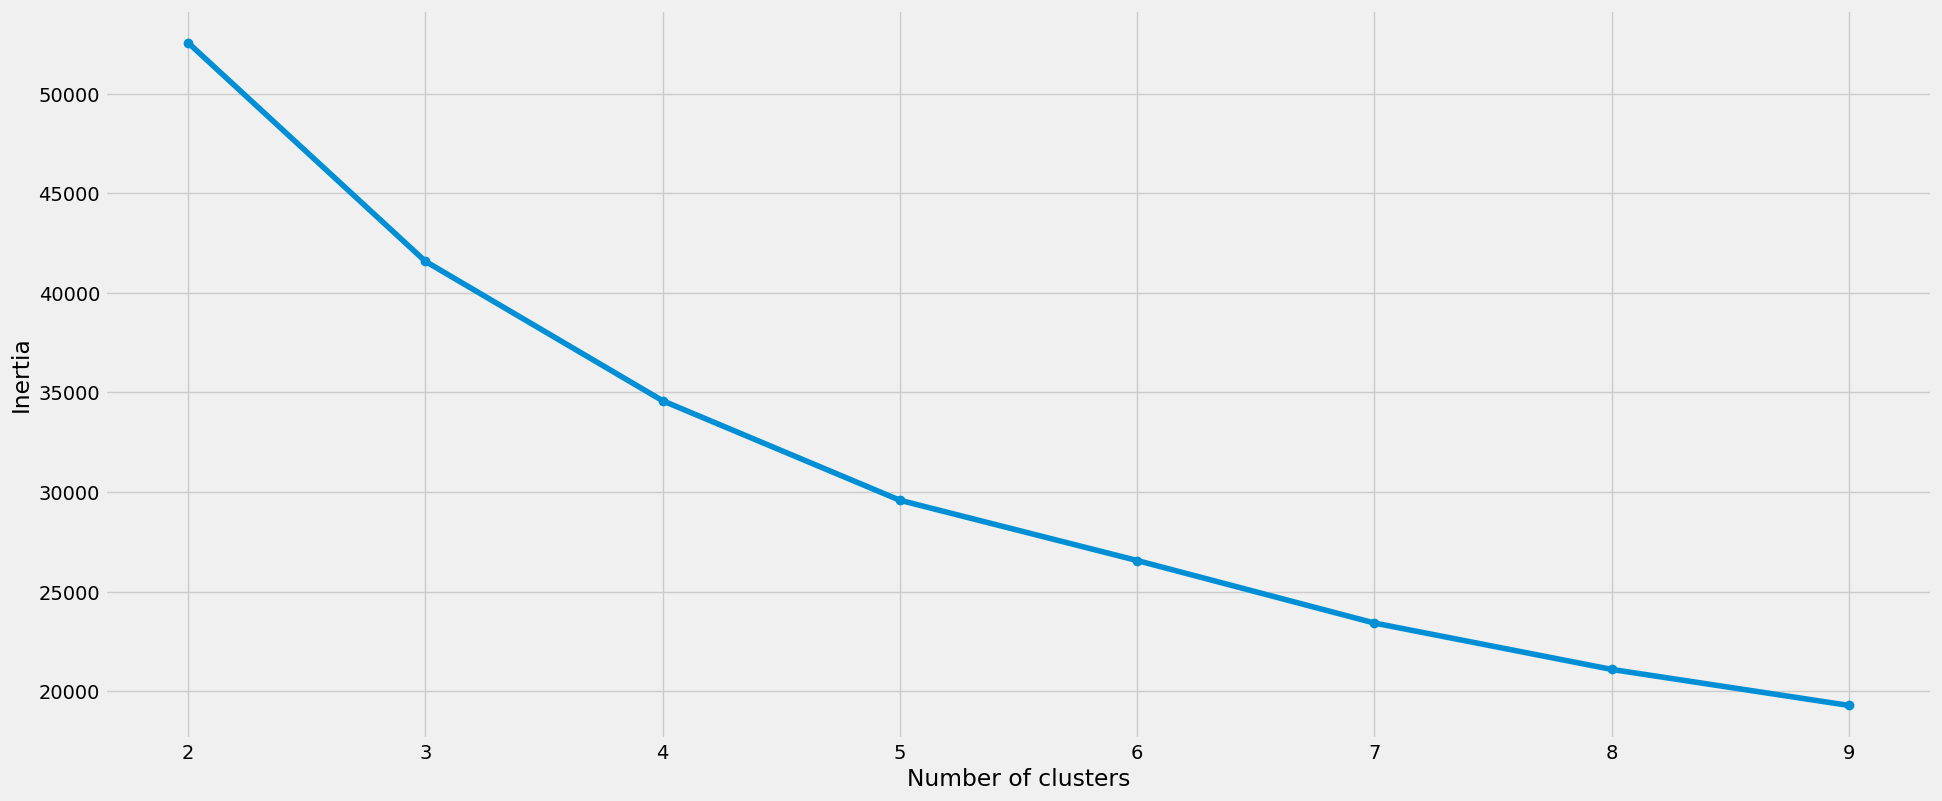

In [ ]:
from sklearn.cluster import KMeans
SSE = []
for cluster in range(2,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_clean_scaled)
    SSE.append(kmeans.inertia_)

_ = pd.DataFrame({'Cluster':range(2,10, 1), 'SSE':SSE})
plt.figure(figsize=(21,9))
plt.plot(_['Cluster'], _['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
K = 4
kmeans = KMeans(n_clusters = K, init='k-means++')
kmeans.fit(df_clean_scaled)
pred = kmeans.predict(df_clean_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df = pd.DataFrame(df_clean_scaled)
df['cluster'] = pred
df['CLIENTNUM'] = df_clean['CLIENTNUM']
df['cluster'].value_counts()

,count
cluster,
1,4255
0,3693
2,1512
3,667


In [ ]:
df

,Attrition_Flag,Customer_Age,Gender,Income_Category,Card_Category,Credit_Limit,Total_Trans_Amt,cluster,CLIENTNUM
0,-0.437506,-0.165406,-1.059956,0.620039,-0.263462,0.446622,-0.959707,0,768805383
1,-0.437506,0.333570,0.943436,-0.736292,-0.263462,-0.041367,-0.916433,1,818770008
2,-0.437506,0.583058,-1.059956,1.298204,-0.263462,-0.573698,-0.740982,0,713982108
3,-0.437506,-0.789126,0.943436,-0.736292,-0.263462,-0.585251,-0.951758,1,769911858
4,-0.437506,-0.789126,-1.059956,0.620039,-0.263462,-0.430877,-1.056263,0,709106358
...,...,...,...,...,...,...,...,...,...
10122,-0.437506,0.458314,-1.059956,-0.058127,-0.263462,-0.509330,3.259358,0,772366833
10123,2.285681,-0.664382,-1.059956,-0.058127,-0.263462,-0.479181,1.283475,2,710638233
10124,2.285681,-0.290150,0.943436,-0.736292,-0.263462,-0.354626,1.732994,2,716506083
10125,2.285681,-2.036565,-1.059956,-0.058127,-0.263462,-0.368710,1.174848,2,717406983


In [ ]:
df_enh = pd.merge(df, df_raw1, on='CLIENTNUM')

In [ ]:
df_enh.head()

,Attrition_Flag_x,Customer_Age_x,Gender_x,Income_Category_x,Card_Category_x,Credit_Limit_x,Total_Trans_Amt_x,cluster,CLIENTNUM,Attrition_Flag_y,Customer_Age_y,Gender_y,Education_Level,Marital_Status,Income_Category_y,Card_Category_y,Credit_Limit_y,Total_Trans_Amt_y
0,-0.437506,-0.165406,-1.059956,0.620039,-0.263462,0.446622,-0.959707,0,768805383,Existing Customer,45,M,High School,Married,3,Blue,12691.0,1144
1,-0.437506,0.333570,0.943436,-0.736292,-0.263462,-0.041367,-0.916433,1,818770008,Existing Customer,49,F,Graduate,Single,1,Blue,8256.0,1291
2,-0.437506,0.583058,-1.059956,1.298204,-0.263462,-0.573698,-0.740982,0,713982108,Existing Customer,51,M,Graduate,Married,4,Blue,3418.0,1887
3,-0.437506,-0.789126,0.943436,-0.736292,-0.263462,-0.585251,-0.951758,1,769911858,Existing Customer,40,F,High School,Unknown,1,Blue,3313.0,1171
4,-0.437506,-0.789126,-1.059956,0.620039,-0.263462,-0.430877,-1.056263,0,709106358,Existing Customer,40,M,Uneducated,Married,3,Blue,4716.0,816


In [ ]:
(
    df_enh
    .groupby('cluster')
    .agg(
        nu_obs=('CLIENTNUM', 'count'),
        avg_age=('Customer_Age_y', 'mean'),
        avg_transaction_amount=('Total_Trans_Amt_y', 'mean'),
        avg_limit=('Credit_Limit_y', 'mean'),
        avg_income=('Income_Category_y', 'mean'),
        mode_attrition=('Attrition_Flag_y', lambda x: x.value_counts().index[0]),
        mode_gender=('Gender_y', lambda x: x.value_counts().index[0])
    )
    .reset_index()
    .sort_values('avg_age')
)


,cluster,nu_obs,avg_age,avg_transaction_amount,avg_limit,avg_income,mode_attrition,mode_gender
3,3,667,45.721139,6864.230885,26350.104948,2.575712,Existing Customer,M
0,0,3693,46.090983,4439.901164,11052.504495,3.307067,Existing Customer,M
1,1,4255,46.506933,4511.960282,4461.555065,0.987779,Existing Customer,F
2,2,1512,46.657407,2927.773810,6639.853968,1.976190,Attrited Customer,F




*   Cluster 0- Male, HighAverage Income, Existing Costumer
*   Cluster 1- Female, Low Average Income, Attrited Costumer
*   Cluster 2- Female, Low Avergae Income, Existing Costumer
*   Cluster 3- Male, Medium Average Income, Existing Costumer




